<h3>Importation des librairies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Chargement des fichiers CSV et Excel dans un DataFrame

In [26]:
df= pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/urbsrn_2024-02_donnnées_IR.csv", delimiter= ';')
dfT = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Data_TESS-W_02-2024.csv", delimiter= ';')
df_03_24 = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/urbsrn_2024-03.csv", delimiter= ';')
df_03_24T = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/Data_TESS-W_03_2024.csv", delimiter= ';')
calcul = pd.ExcelFile("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Calcul.xlsx")

<h3>Définition des données</h3>

<p>CRGE-4 02-2024

In [4]:
IR_aa03_Avg = df['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg = df['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df['DateTime'] = pd.to_datetime(df['day'] + ' ' + df['hour'], dayfirst = True) 
Date = df['DateTime']

<p>TESS-W 02-2024

In [5]:
t_amb = dfT['tamb'] # Température ambiante en °C
t_sky = dfT['tsky'] # Température du ciel en °C
p_sky = dfT['psky'] # Puissance du ciel en W/m²

# Définition du temps
dfT['DateTimeT'] = pd.to_datetime(dfT['Day'] + ' ' + dfT['Hour'], dayfirst = True) 
DateT = dfT['DateTimeT']

CRG4 03-2024

In [6]:
IR_aa03_Avg_03_24 = df_03_24['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg_03_24 = df_03_24['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df_03_24['DateTime'] = pd.to_datetime(df_03_24['day'] + ' ' + df_03_24['hour'], dayfirst = True)
Date_03_24 = df_03_24['DateTime']

TESS-W 03-2024

In [7]:
t_amb_03_24_K = df_03_24T['tamb'] + 273 # Température ambiante en Kelvin
t_sky_03_24_K = df_03_24T['tsky'] + 273 # Température du ciel en Kelvin

# Définition du temps
df_03_24T['DateTime'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour'], dayfirst = True)
Date_03_24T = df_03_24T['DateTime']

<h3>Affichage des graphes</h3>

Affichage des graphes  pour les CRG4 03-2024

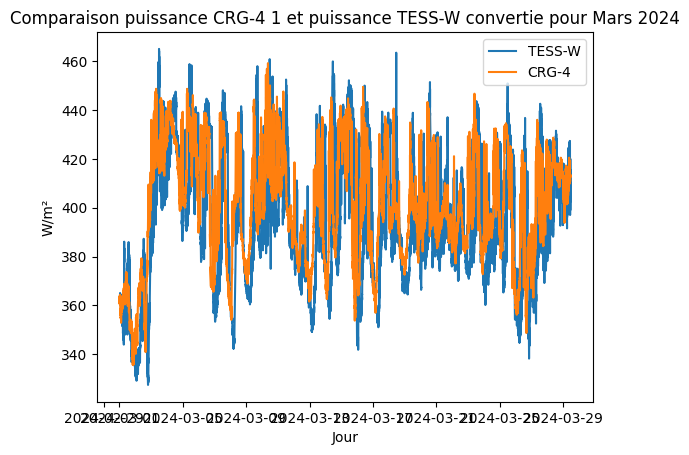

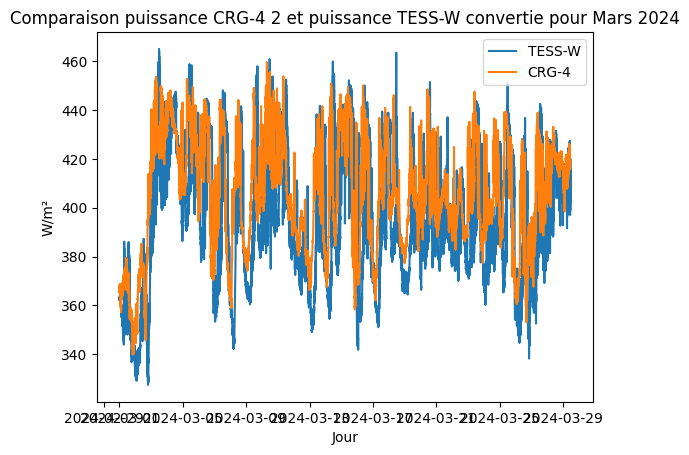

In [5]:
plt.plot(Date_03_24T, 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_qa03_Avg_03_24, label = 'CRG-4')
plt.title('Comparaison puissance CRG-4 1 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

plt.plot(Date_03_24T, 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_aa03_Avg_03_24, label = 'CRG-4')
plt.title('Comparaison puissance CRG-4 2 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()

<h3>Pourcentage Nébulosité nocturne 03-2024

<h3>Test programme</h3>

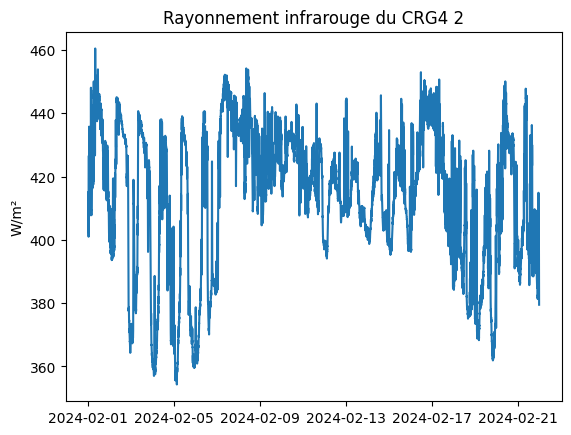

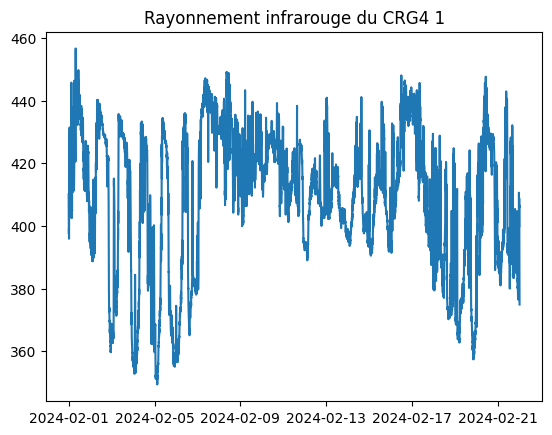

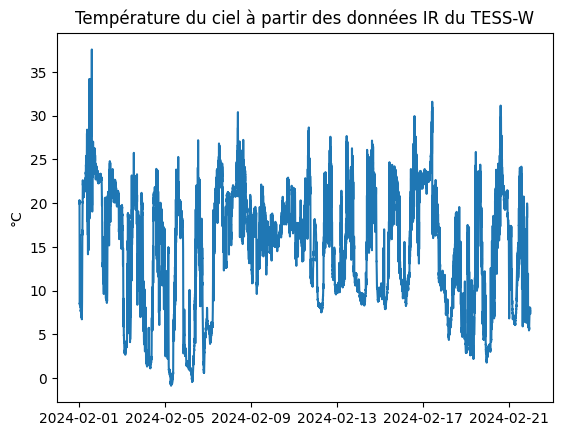

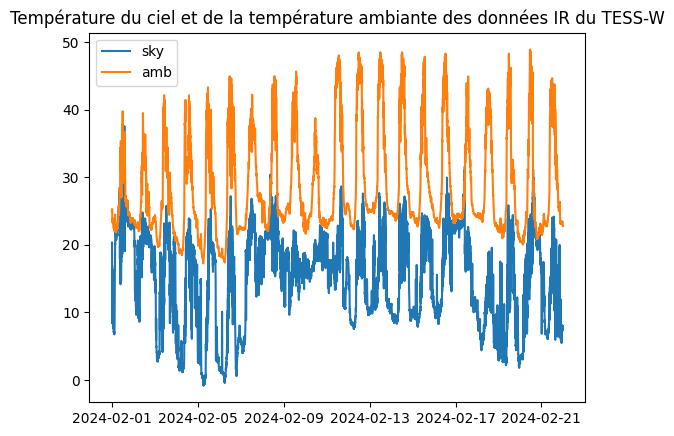

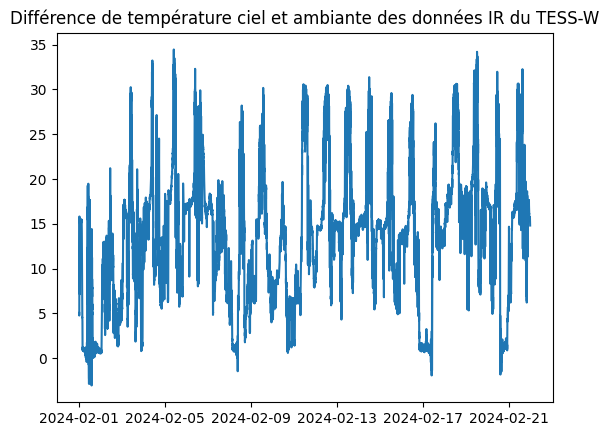

In [14]:
plt.plot(Date, IR_aa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 2')
plt.ylabel('W/m²')
plt.show()
plt.plot(Date, IR_qa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 1')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.title('Température du ciel à partir des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.plot(DateT, t_amb, label='amb')
plt.title('Température du ciel et de la température ambiante des données IR du TESS-W')
plt.legend()
plt.show()

plt.plot(DateT, t_amb - t_sky)
plt.title('Différence de température ciel et ambiante des données IR du TESS-W')
plt.show()
plt.plot(DateT, p_sky_e)
plt.show()

plt.plot(Date, IR_aa03_Avg)
plt.plot(DateT, p_sky_e)
plt.title('Données CRG4 et TESS-W')

In [27]:
for sheet_name in calcul.sheet_names:
    df_Neb = pd.read_excel(calcul, sheet_name= "Données Tess Nuit 03-24")
    
    df_Neb['DateTime'] = pd.to_datetime(df_Neb['day'] + ' ' + df_Neb['hour'])
    Pourcentage = df_Neb['Pourcentage']
    
    plt.plot(df_Neb['day'], Pourcentage)

TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'